Topic modelling a dataset of Abstracts on different topics using Text pre-processing, LDA and NMF

the dataset can be found in the below link.
https://www.kaggle.com/code/mahmoudlimam/topic-modelling-bow-tf-idf-lda-nmf/notebook

In [2]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv(r"train.csv\train.csv")

In [43]:
len(df)

20972

In [44]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# df["ABSTRACT"] = df["ABSTRACT"].apply(lambda x :[stemmer.stem(i) for i in x.split()])

In [46]:
from nltk.corpus import stopwords
stops = stopwords.words("english")
df["ABSTRACT"] = df["ABSTRACT"].apply(lambda x: [i for i in x.split() if i not in stops])


In [47]:
df["ABSTRACT"] = df["ABSTRACT"].apply(lambda x: " ".join(x))

In [49]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_abs = cv.fit_transform(df["ABSTRACT"])

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components = 6, random_state = 42)
abslda = LDA.fit(dtm_abs)

In [51]:
for i, words in enumerate(abslda.components_):
    print(f"the topic number {i}")
    print([cv.get_feature_names()[i] for i in words.argsort()[-50:]])
    print("\n")

the topic number 0
['sim', 'times', 'sources', 'simulations', 'dust', 'resolution', 'based', 'time', 'field', 'planets', 'range', 'disk', 'gravitational', 'distribution', 'energy', 'cluster', 'planet', 'light', 'solar', 'evolution', 'scale', 'flow', 'line', 'low', 'matter', 'density', 'model', 'models', 'ray', 'velocity', 'observed', 'results', 'emission', 'large', 'formation', 'rm', 'present', 'dark', 'galaxy', 'stellar', 'gas', 'high', 'stars', 'using', 'data', 'galaxies', 'observations', 'star', '10', 'mass']


the topic number 1
['simulations', 'demonstrate', 'used', 'electronic', 'theory', 'particle', 'observed', 'band', 'non', 'materials', 'large', 'dimensional', 'interactions', 'effects', 'experimental', 'coupling', 'interaction', 'range', 'optical', 'frequency', 'single', 'order', 'structure', 'based', 'different', 'density', 'study', 'wave', 'effect', 'systems', 'surface', 'electron', 'low', 'properties', 'dynamics', 'results', 'time', 'transition', 'using', 'states', 'high', 

In [12]:
LDA.components_.shape

(6, 27580)

In [86]:
topics = {0 : "PLysics",
1 : "Comp SC",
2 : "Quant fin",
3 : "Stat",
4 : "Maths",
5 : "Quant Bio"}

In [70]:
topic = LDA.transform(dtm_abs)

In [71]:
topic = topic.argmax(axis = 1)
df["predict topic"] = topic
df["predict topic"] = df["predict topic"].map(topics)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,predict topic
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific infer...,1,0,0,0,0,0,Stat
1,2,Rotation Invariance Neural Network,Rotation invariance translation invariance gre...,1,0,0,0,0,0,Quant fin
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce develop notion spherical polyharm...,0,0,1,0,0,0,Maths
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LLG)...,0,0,1,0,0,0,Maths
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra sam...,1,0,0,1,0,0,Stat


Topic modeing using TFIDF and LDA

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
idf_dtm = tfid.fit_transform(df["ABSTRACT"])

In [74]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6, random_state = 42)
nmfdm = nmf.fit(idf_dtm)

In [77]:
for i, words in enumerate(nmfdm.components_):
    print(f"topic {i}")
    print([tfid.get_feature_names()[word] for word in words.argsort()[-50:]])
    print("\n")

topic 0
['bound', 'rank', 'distributed', 'design', 'descent', 'state', 'estimation', 'computational', 'cost', 'bounds', 'objective', 'new', 'order', 'solving', 'solve', 'results', 'propose', 'learning', 'error', 'functions', 'efficient', 'non', 'performance', 'complexity', 'number', 'approach', 'approximation', 'rate', 'paper', 'based', 'matrix', 'numerical', 'function', 'methods', 'solution', 'linear', 'gradient', 'control', 'proposed', 'time', 'convergence', 'convex', 'stochastic', 'method', 'optimal', 'problems', 'algorithms', 'optimization', 'problem', 'algorithm']


topic 1
['conjecture', 'lambda', 'differential', 'curvature', 'infty', 'certain', 'results', 'manifold', 'positive', 'conditions', 'proof', 'bounded', 'operators', 'existence', 'order', 'metric', 'alpha', 'compact', 'dimensional', 'given', 'dimension', 'operator', 'algebras', 'paper', 'non', 'set', 'class', 'study', 'let', 'case', 'omega', 'function', 'boundary', 'result', 'equations', 'solutions', 'algebra', 'theory',

In [107]:
lda_topics = nmf.transform(idf_dtm)

In [108]:
topic_lda = lda_topics.argmax(axis = 1)

In [109]:
df["lda_topics"] = topic_lda

In [110]:
topics_nmf = {0 : "Comp SC",
1 : "Maths",
2 : "PLysics",
3 : "Quant Bio",
4 : "Quant fin",
5 : "Stat"}

In [111]:
df["lda_topics"] = df["lda_topics"].map(topics_nmf)

In [112]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,predict topic,lda_topics
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific infer...,1,0,0,0,0,0,Stat,Quant fin
1,2,Rotation Invariance Neural Network,Rotation invariance translation invariance gre...,1,0,0,0,0,0,Quant fin,Quant Bio
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce develop notion spherical polyharm...,0,0,1,0,0,0,Maths,Maths
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LLG)...,0,0,1,0,0,0,Maths,Maths
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra sam...,1,0,0,1,0,0,Stat,Quant fin


In [93]:
y = df.drop(["ID","TITLE","ABSTRACT","predict topic","lda_topics"], axis=1)

In [96]:
realtopic = y.idxmax(axis =1)

<Figure size 2000x800 with 4 Axes>

In [115]:
from sklearn.metrics import accuracy_score
print(accuracy_score(realtopic, df["predict topic"]))

0.0


In [116]:
print(accuracy_score(realtopic, df["lda_topics"]))

0.0


In [117]:
print(accuracy_score(df["predict topic"],df["lda_topics"]))

0.3242895288956704


Topic medilling by removing some parameters using NMF, countvectorization and TFIDF

In [119]:
df_new = pd.read_csv(r"train.csv\train.csv")

In [130]:
df_new.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [166]:
len(df[df["Statistics"] == 1])

5206

In [143]:
y = df_new.drop(["Quantitative Biology","Quantitative Finance", "ID", "TITLE","ABSTRACT"], axis = 1)

In [144]:
y.head()

,Computer Science,Physics,Mathematics,Statistics
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,1


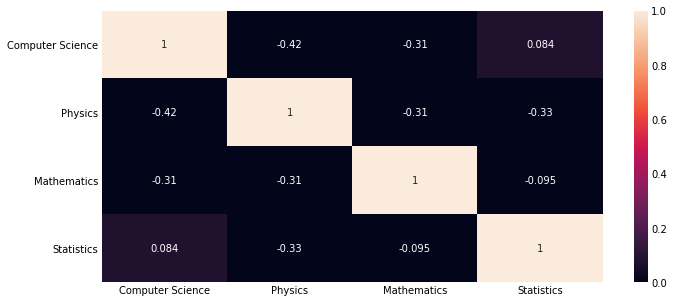

In [149]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(y.corr(), vmin=0, vmax=1, annot=True)

In [175]:
for i in range(y.shape[0]):
    if y.loc[i, "Statistics"]==1:
        y.loc[i, "Mathematics"]=1
y.drop([ "Statistics"], axis=1, inplace=True)

In [167]:
from nltk.corpus import stopwords
stops = stopwords.words("english")
df_new["ABSTRACT"] = df_new["ABSTRACT"].apply(lambda x: [i for i in x.split() if i not in stops])

In [171]:
df_new["ABSTRACT"] = df_new["ABSTRACT"].apply(lambda x: " ".join(x))

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.95,
    min_df=2,stop_words="english")
dtm = count.fit_transform(df_new["ABSTRACT"])

In [176]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, random_state = 42)
ldamt = lda.fit(dtm)

In [177]:
for i, words in enumerate(ldamt.components_):
    print(f"words for topic {i}")
    print([count.get_feature_names()[word] for word in words.argsort()[-50:]])
    print("\n")

words for topic 0
['convex', 'graphs', 'particular', 'point', 'method', 'solution', 'algorithm', 'bound', 'field', 'conditions', 'matrix', 'consider', 'properties', 'distribution', 'model', 'present', 'graph', 'class', 'solutions', 'known', 'type', 'general', 'mass', 'dimensional', 'mathcal', 'equations', 'equation', 'group', 'result', 'given', 'using', 'new', 'set', 'theory', 'linear', 'order', 'functions', 'finite', 'case', 'number', 'mathbb', 'time', 'study', 'function', 'non', 'prove', 'space', 'paper', 'results', 'problem']


words for topic 1
['applications', 'image', 'set', 'existing', 'experiments', 'task', 'machine', 'features', 'accuracy', 'problems', 'optimization', 'novel', 'present', 'demonstrate', 'number', 'work', 'high', 'large', 'real', 'framework', 'use', 'training', 'state', 'different', 'analysis', 'deep', 'algorithms', 'new', 'information', 'neural', 'used', 'propose', 'problem', 'results', 'networks', 'performance', 'time', 'algorithm', 'methods', 'models', 'appro

In [178]:
topics = {0:"Maths",
1:"Comp Sc",
2:"Physics"}

In [180]:
topics_count = lda.transform(dtm)

In [181]:
topics_count = topics_count.argmax(axis = 1)

In [183]:
df_new["count_topics"] = topics_count

In [184]:
df_new["count_topics"] = df_new["count_topics"].map(topics)

In [185]:
df_new.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,count_topics
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific infer...,1,0,0,0,0,0,Comp Sc
1,2,Rotation Invariance Neural Network,Rotation invariance translation invariance gre...,1,0,0,0,0,0,Comp Sc
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce develop notion spherical polyharm...,0,0,1,0,0,0,Maths
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LLG)...,0,0,1,0,0,0,Maths
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra sam...,1,0,0,1,0,0,Comp Sc


with tfidf

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_df=0.95,
    min_df=2,stop_words="english")
dtm = tf.fit_transform(df_new["ABSTRACT"])

In [188]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, random_state = 42)
ldadm = lda.fit(dtm)

In [189]:
for i, words in enumerate(ldadm.components_):
    print(f"words for topic {i}")
    print([tf.get_feature_names()[word] for word in words.argsort()[-50:]])
    print("\n")

words for topic 0
['bounded', 'obtain', 'bound', 'graphs', 'known', 'omega', 'existence', 'solution', 'proof', 'time', 'operator', 'linear', 'new', 'general', 'class', 'polynomial', 'conditions', 'alpha', 'dimensional', 'field', 'set', 'algebra', 'given', 'number', 'mass', 'spaces', 'groups', 'theorem', 'order', 'problem', 'boundary', 'results', 'case', 'result', 'paper', 'type', 'non', 'function', 'study', 'solutions', 'theory', 'functions', 'group', 'finite', 'mathcal', 'equations', 'equation', 'space', 'prove', 'mathbb']


words for topic 1
['set', 'task', 'novel', 'features', 'machine', 'process', 'demonstrate', 'distribution', 'optimal', 'control', 'present', 'high', 'work', 'number', 'real', 'systems', 'large', 'optimization', 'use', 'problems', 'state', 'framework', 'different', 'training', 'deep', 'analysis', 'new', 'used', 'algorithms', 'propose', 'results', 'neural', 'information', 'performance', 'using', 'paper', 'proposed', 'problem', 'methods', 'time', 'approach', 'network

In [191]:
topics_tf = lda.transform(dtm)
topics_tf = topics_tf.argmax(axis =1)
df_new["topic_tf"] = topics_tf
df_new["topic_tf"] = df_new["topic_tf"].map(topics)

In [192]:
df_new.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,count_topics,topic_tf
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific infer...,1,0,0,0,0,0,Comp Sc,Comp Sc
1,2,Rotation Invariance Neural Network,Rotation invariance translation invariance gre...,1,0,0,0,0,0,Comp Sc,Comp Sc
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce develop notion spherical polyharm...,0,0,1,0,0,0,Maths,Maths
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LLG)...,0,0,1,0,0,0,Maths,Maths
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra sam...,1,0,0,1,0,0,Comp Sc,Comp Sc


In [193]:
realtopics = y.idxmax(axis = 1)

In [196]:
print(accuracy_score(realtopics,df_new["topic_tf"]))

0.13622925805836353


In [197]:
print(accuracy_score(realtopics,df_new["count_topics"]))

0.15844936105283236


In [199]:
print(accuracy_score(df_new["topic_tf"],df_new["count_topics"]))

0.8779324814037764


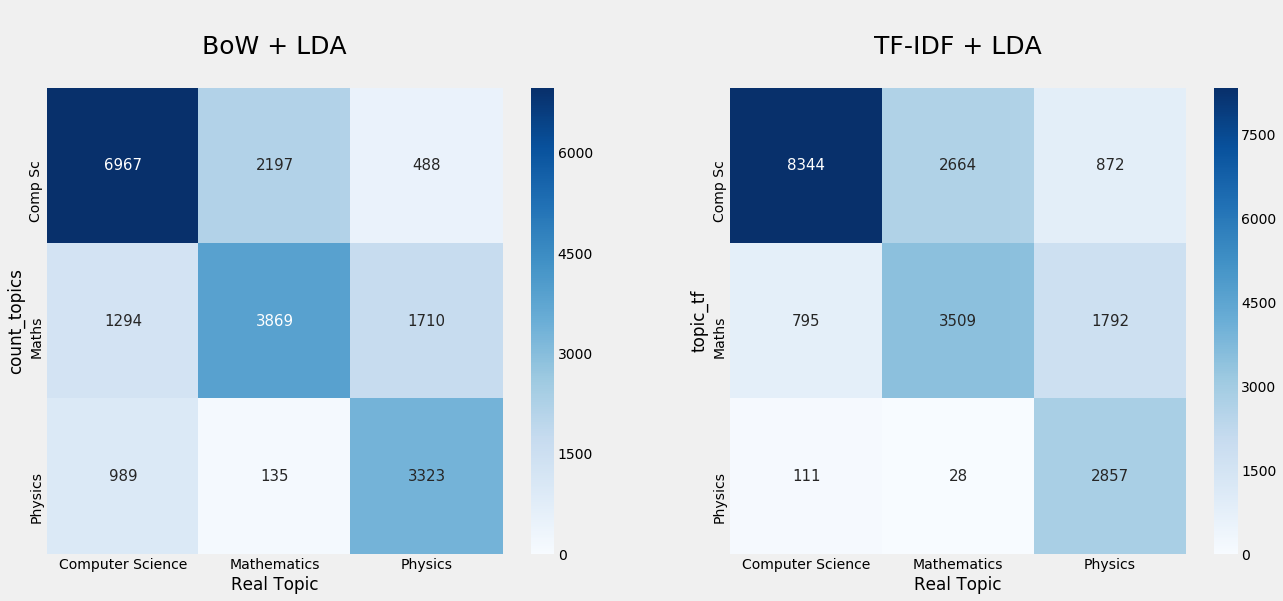

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.heatmap(pd.crosstab(df_new["count_topics"], realtopics), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=axes[0])
axes[0].set_xlabel("Real Topic")
axes[0].set_title("\nBoW + LDA\n", fontsize=25)

sns.heatmap(pd.crosstab(df_new["topic_tf"], realtopics), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=axes[1])
axes[1].set_xlabel("Real Topic")
axes[1].set_title("\nTF-IDF + LDA\n", fontsize=25)

plt.show()